In [6]:
import pandas as pd

data = pd.read_csv('/content/data.csv', delimiter = ';')
data['Экспорт'] = data['Экспорт'].str.replace(',', '.').astype(float)
data.index_col = 'Область'
data

,Год,Область,Экспорт
0,2000,Курганская область,113.2
1,2000,Свердловская область,284.0
2,2000,Тюменская область,1197.9
3,2000,Челябинская область,213.0
4,2001,Курганская область,75.0
...,...,...,...
83,2020,Челябинская область,1972.7
84,2021,Курганская область,81.0
85,2021,Свердловская область,1671.2
86,2021,Тюменская область,518.8


In [7]:
unique_regions = data['Область'].unique()
region_wise_data = {region: data[data['Область'] == region] for region in unique_regions}

data = region_wise_data['Челябинская область']
data = data.drop('Область', axis=1)

data.rename(columns={
    'Год': 't',
    'Экспорт': 'Y(t)',
}, inplace=True)
data

,t,Y(t)
3,2000,213.00
7,2001,271.80
11,2002,259.50
15,2003,436.30
19,2004,660.00
23,2005,941.50
27,2006,1134.50
31,2007,1828.40
35,2008,2228.30
39,2009,1114.80


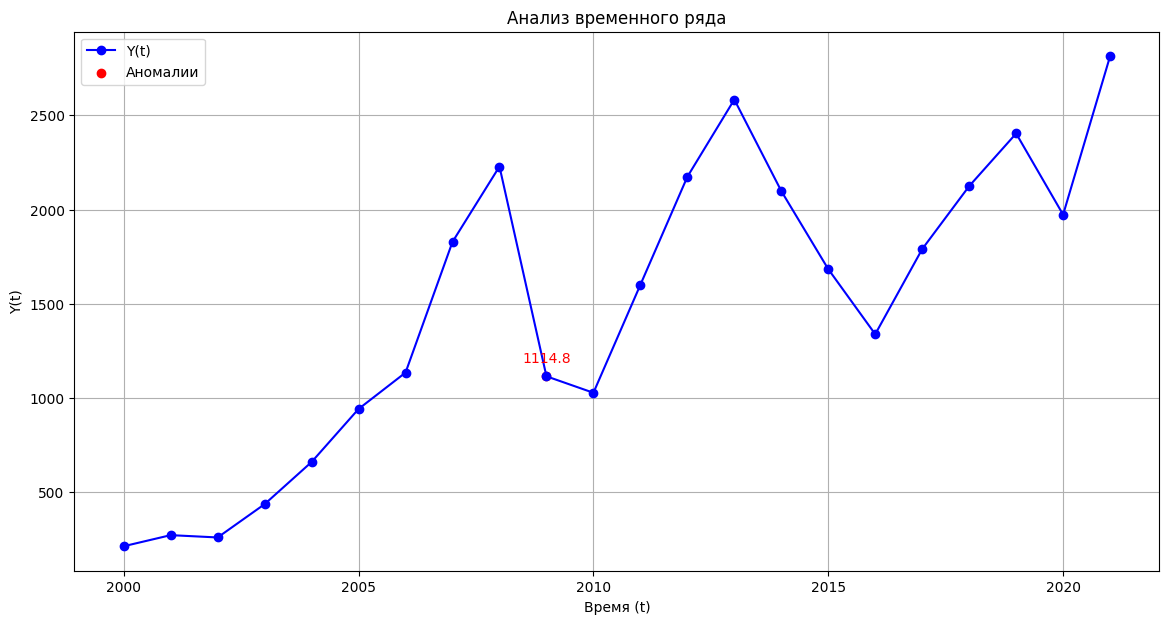

       t     Y(t)   Y(t) - Yср        λt  Anomaly
3   2000   213.00 -1273.243182       NaN    False
7   2001   271.80 -1214.443182  0.073922    False
11  2002   259.50 -1226.743182  0.015463    False
15  2003   436.30 -1049.943182  0.222269    False
19  2004   660.00  -826.243182  0.281231    False
23  2005   941.50  -544.743182  0.353896    False
27  2006  1134.50  -351.743182  0.242635    False
31  2007  1828.40   342.156818  0.872356    False
35  2008  2228.30   742.056818  0.502746    False
39  2009  1114.80  -371.443182  1.399868     True
43  2010  1027.40  -458.843182  0.109877    False
47  2011  1600.55   114.306818  0.720552    False
51  2012  2173.70   687.456818  0.720552    False
55  2013  2583.60  1097.356818  0.515317    False
59  2014  2098.10   611.856818  0.610360    False
63  2015  1683.60   197.356818  0.521100    False
67  2016  1338.20  -148.043182  0.434229    False
71  2017  1790.10   303.856818  0.568119    False
75  2018  2124.20   637.956818  0.420023    False


In [8]:
import numpy as np
import matplotlib.pyplot as plt



# Определение данных временного ряда
#data = {
#    "t": list(range(1, 35)), # Временной индекс t
#    "Y(t)": [100, 142.77, 124.92, 115.21, 113.02, 110.01, 105.08, 100.8, 104.57, 105.29, 103.03, 100.5,
#             101.81, 103.03, 101, 143.81, 123.27, 116, 107.3, 105.6, 103.9, 103.94, 105.4, 104.2,
#             105.4, 107.1, 105.3, 101.1, 104.1, 105.5, 103.4, 101.2, 104.26, 105.2]
#}

# Создание DataFrame
#df = pd.DataFrame(data)

df = data
mean_y = df['Y(t)'].mean()
std_dev = df['Y(t)'].std(ddof=1)  # Using Bessel's correction with ddof=1

# Adding a new column to DataFrame for the difference between each observation and the mean (Y(t) - Yср)
df['Y(t) - Yср'] = df['Y(t)'] - mean_y

# Calculate λt for t=2,3,...n (as t=1 does not have a previous value)
df['λt'] = df['Y(t)'].diff().abs() / std_dev

lambda_alpha_30 = 1.2
lambda_alpha_50 = 1.1
lambda_alpha = lambda_alpha_30 - ((30 - 34) / (50 - 30)) * (lambda_alpha_30 - lambda_alpha_50)



df['λt'] = df['Y(t)'].diff().abs() / std_dev

df['Anomaly'] = df['λt'] > lambda_alpha


# Построение графика с указанием аномалий и значений этих аномалий

plt.figure(figsize=(14, 7))
# Отрисовка основной линии временного ряда
plt.plot(df['t'], df['Y(t)'], marker='o', linestyle='-', color='blue', label='Y(t)')

# Выделение аномалий
for index, row in df[df['Anomaly']].iterrows():
    plt.annotate(f"{row['Y(t)']}", # Текст аннотации - значение Y(t)
                 (row['t'], row['Y(t)']), # Координаты точки, которую аннотируем
                 textcoords="offset points", # Как интерпретировать координаты
                 xytext=(0,10), # Смещение метки аннотации
                 ha='center', # Горизонтальное выравнивание текста
                 color='red') # Цвет текста

# Обозначение аномалий красными точками
plt.scatter(df[df['Anomaly']]['t'], df[df['Anomaly']]['Y(t)'], color='red', label='Аномалии')

# Добавление заголовка и подписей осей
plt.title('Анализ временного ряда')
plt.xlabel('Время (t)')
plt.ylabel('Y(t)')
plt.grid(True)
plt.legend()

# Отображение графика с аномалиями
plt.show()

sum_squared_diff = ((df['Y(t)'] - mean_y)**2).sum()
variance_y = sum_squared_diff / (df['t'].count() - 1)
std_dev_y = np.sqrt(variance_y)


print(df)
print(mean_y, std_dev, std_dev_y)